In [149]:
import pandas as pd
import numpy as np
from math import cos, sin, pi, sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt

In [150]:
#I decided to use the dimensions of the Saturn V Rocket
m = 2800000 #mass of Saturn V in kg
k = 14000 #exhaust rate of mass in kg/s
vex = 2400 #exhaust velocity in m/s
g = -9.8
a = 0
xi = 0
vx = 0
t = 0 #in seconds
dt = .1

In [151]:
def thrust(t):
    return k/(m-(k*t))

In [152]:
x = xi
tlist = []
xlist = []
vxlist = []
tlist.append(t)
xlist.append(x)
vxlist.append(vx)

In [153]:
#When using the relationship we solved in 3.11, I got a velocity of around 1023.1 m/s, so this is not a bad approx
while t <= 120:
    a = (vex*thrust(t)) + g
    vx = vx + a*dt
    x = x + vx*dt
    xlist.append(x)
    vxlist.append(vx)
    t = t + dt
    tlist.append(t)
data = pd.DataFrame({'t': tlist, 'x': xlist, 'vx': vxlist})
data

,t,x,vx
0,0.0,0.000000,0.000000
1,0.1,0.022000,0.220000
2,0.2,0.066060,0.440600
3,0.3,0.132240,0.661802
4,0.4,0.220601,0.883604
...,...,...,...
1197,119.7,41219.303577,1016.160454
1198,119.8,41321.120502,1018.169246
1199,119.9,41423.138678,1020.181764
1200,120.0,41525.358480,1022.198019


In [231]:
m = 2800000 #mass of Saturn V in kg
k = 14000 #exhaust rate of mass in kg/s
vex = 2400 #exhaust velocity in m/s
g = -9.8
a = 0
xi = 0
vx = 0
t = 0 #in seconds
dt = .1
x = 0
xreal = 0
term = k/(m-(k*t))
xanlist = []
tanlist = []
xanlist.append(xreal)
tanlist.append(t)

In [232]:
while t<=120:
    c = m - (k*t)
    x = x + (2400*.1) - (4.9*.01) - ((c*2400)/14000)*(term*.1)
    t = t + dt
    xreal = x/2.082
    tanlist.append(t)
    xanlist.append(xreal)
analytic = pd.DataFrame({'tnew': tanlist, 'xnew': xanlist})
analytic

,tnew,xnew
0,0.0,0.000000
1,0.1,-0.023535
2,0.2,0.010567
3,0.3,0.102305
4,0.4,0.251681
...,...,...
1197,119.7,41228.658501
1198,119.8,41297.626321
1199,119.9,41366.651777
1200,120.0,41435.734870


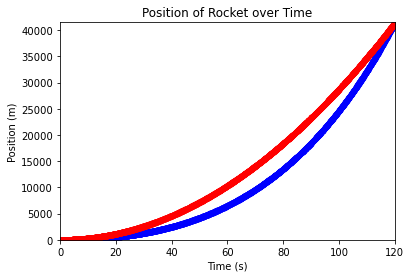

In [233]:
plt.plot(data['t'], data['x'], linestyle = '--', marker = 'o', color = 'b', markersize = '5')
plt.plot(analytic['tnew'], analytic['xnew'], linestyle = '--', marker = 'o', color = 'r', markersize = '5')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position of Rocket over Time")
plt.xlim(0,120)
plt.ylim(0,xreal)
plt.show()